# Pixelation Differentiation

---- meta data -----
Spider-man
Insomniac Games
spiderman.jpeg
JPEG
RGB
Original size:  (300, 168)
Scaled size:  (320, 179)
-- scaled image --



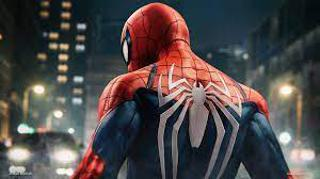

--- grey scale ---



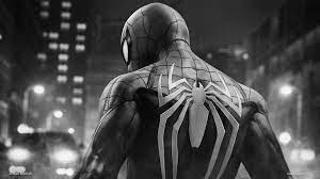

--- black scale ---



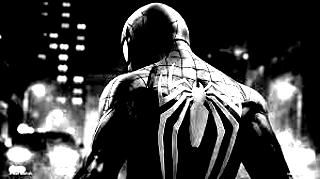

--- white scale ---



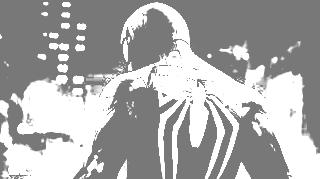

In [67]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np


class Image_Data:

    def __init__(self, source, label, file, path, baseWidth=320):
        self._source = source    # variables with self prefix become part of the object, 
        self._label = label
        self._file = file
        self._filename = path / file  # file with path
        self._baseWidth = baseWidth

        # Open image and scale to needs
        self._img = pilImage.open(self._filename)
        self._format = self._img.format
        self._mode = self._img.mode
        self._originalSize = self.img.size
        self.scale_image()
        self._html = self.image_to_html(self._img)
        self._html_grey = self.image_to_html_grey()
        self._html_black = self.image_to_html_black()
        self._html_white = self.image_to_html_white()


    @property
    def source(self):
        return self._source  
    
    @property
    def label(self):
        return self._label 
    
    @property
    def file(self):
        return self._file   
    
    @property
    def filename(self):
        return self._filename   
    
    @property
    def img(self):
        return self._img
             
    @property
    def format(self):
        return self._format
    
    @property
    def mode(self):
        return self._mode
    
    @property
    def originalSize(self):
        return self._originalSize
    
    @property
    def size(self):
        return self._img.size
    
    @property
    def html(self):
        return self._html
    
    @property
    def html_grey(self):
        return self._html_grey

    @property
    def html_black(self):
        return self._html_black

    @property
    def html_white(self):
        return self._html_white
        
    # Large image scaled to baseWidth of 320
    def scale_image(self):
        scalePercent = (self._baseWidth/float(self._img.size[0]))
        scaleHeight = int((float(self._img.size[1])*float(scalePercent)))
        scale = (self._baseWidth, scaleHeight)
        self._img = self._img.resize(scale)
    
    # PIL image converted to base64
    def image_to_html(self, img):
        with BytesIO() as buffer:
            img.save(buffer, self._format)
            return '<img src="data:image/png;base64,%s">' % base64.b64encode(buffer.getvalue()).decode()
    
    def image_to_html_grey(self):
        img_grey = self._img
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        grey_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
            if len(pixel) > 3:
                grey_data.append((average, average, average, pixel[3])) # PNG format
            else:
                grey_data.append((average, average, average))
            # end for loop for pixels
            
        img_grey.putdata(grey_data)
        return self.image_to_html(img_grey)

    def image_to_html_black(self):
        img_black = self._img
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        black_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            average = (pixel[0] + pixel[1] + pixel[2]) -200  # average pixel values and use // for integer division
            if len(pixel) > 3:
                black_data.append((average, average, average, pixel[3])) # PNG format
            else:
                black_data.append((average, average, average))
            # end for loop for pixels
            
        img_black.putdata(black_data)
        return self.image_to_html(img_black)

    def image_to_html_white(self):
        img_white = self._img
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        white_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            average = ((pixel[0]+40)+ (pixel[1]+40) + (pixel[2]+40))  # average pixel values and use // for integer division
            if len(pixel) > 3:
                white_data.append((average, average, average, pixel[3])) # PNG format
            else:
                white_data.append((average, average, average))
            # end for loop for pixels
            
        img_white.putdata(white_data)
        return self.image_to_html(img_white)
        
# prepares a series of images, provides expectation for requigrey contents
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Insomniac Games", 'label': "Spider-man", 'file': "spiderman.jpeg"}
        ]
    return path, images

# turns data into objects
def image_objects():        
    id_Objects = []
    path, images = image_data()
    for image in images:
        id_Objects.append(Image_Data(source=image['source'], 
                                  label=image['label'],
                                  file=image['file'],
                                  path=path,
                                  ))
    return id_Objects

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    for ido in image_objects(): # ido is an Imaged Data Object
        
        print("---- meta data -----")
        print(ido.label)
        print(ido.source)
        print(ido.file)
        print(ido.format)
        print(ido.mode)
        print("Original size: ", ido.originalSize)
        print("Scaled size: ", ido.size)
        
        print("-- scaled image --")
        display(HTML(ido.html))
        
        print("--- grey scale ---")
        display(HTML(ido.html_grey))

        print("--- black scale ---")
        display(HTML(ido.html_black))

        print("--- white scale ---")
        display(HTML(ido.html_white))
        
    print()

---- meta data -----
Spider-man
Insomniac Games
spiderman.jpeg
JPEG
RGB
Original size:  (300, 168)
Scaled size:  (320, 179)
-- scaled image --



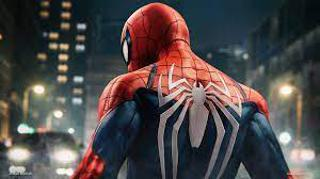

--- red scale ---



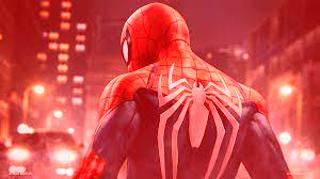

--- green scale ---



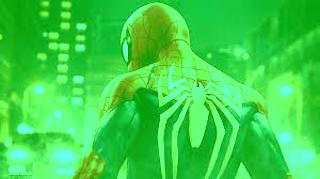

--- blue scale ---



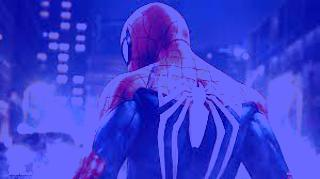

In [82]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np


class Image_Data:

    def __init__(self, source, label, file, path, baseWidth=320):
        self._source = source    # variables with self prefix become part of the object, 
        self._label = label
        self._file = file
        self._filename = path / file  # file with path
        self._baseWidth = baseWidth

        # Open image and scale to needs
        self._img = pilImage.open(self._filename)
        self._format = self._img.format
        self._mode = self._img.mode
        self._originalSize = self.img.size
        self.scale_image()
        self._html = self.image_to_html(self._img)
        self._html_red = self.image_to_html_red()
        self._html_green = self.image_to_html_green()
        self._html_blue = self.image_to_html_blue()
 


    @property
    def source(self):
        return self._source  
    
    @property
    def label(self):
        return self._label 
    
    @property
    def file(self):
        return self._file   
    
    @property
    def filename(self):
        return self._filename   
    
    @property
    def img(self):
        return self._img
             
    @property
    def format(self):
        return self._format
    
    @property
    def mode(self):
        return self._mode
    
    @property
    def originalSize(self):
        return self._originalSize
    
    @property
    def size(self):
        return self._img.size
    
    @property
    def html(self):
        return self._html
    
    @property
    def html_red(self):
        return self._html_red
    
    @property
    def html_green(self):
        return self._html_green
    
    @property
    def html_blue(self):
        return self._html_blue
        
    # Large image scaled to baseWidth of 320
    def scale_image(self):
        scalePercent = (self._baseWidth/float(self._img.size[0]))
        scaleHeight = int((float(self._img.size[1])*float(scalePercent)))
        scale = (self._baseWidth, scaleHeight)
        self._img = self._img.resize(scale)
    
    # PIL image converted to base64
    def image_to_html(self, img):
        with BytesIO() as buffer:
            img.save(buffer, self._format)
            return '<img src="data:image/png;base64,%s">' % base64.b64encode(buffer.getvalue()).decode()
    
    def image_to_html_red(self):
        img_red = self._img
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        red_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # adding 150 to R of RBG to make it red
            pixel[0] = (pixel[0] + 150)
            pixel[1] = (pixel[1])
            pixel[2] = (pixel[2])
            if len(pixel) > 3:
                red_data.append((pixel[0], pixel[1], pixel[2], pixel[3])) # PNG format
            else:
                red_data.append((pixel[0], pixel[1], pixel[2]))
            # end for loop for pixels
            
        img_red.putdata(red_data)
        return self.image_to_html(img_red)

    def image_to_html_green(self):
        img_green = self._img
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        green_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # minus 150 from R to revert back to normal then adding 150 to G to make it green
            pixel[0] = (pixel[0] - 150)
            pixel[1] = (pixel[1] + 150)
            pixel[2] = (pixel[2])
            if len(pixel) > 3:
                green_data.append((pixel[0], pixel[1], pixel[2], pixel[3])) # PNG format
            else:
                green_data.append((pixel[0], pixel[1], pixel[2]))
            # end for loop for pixels
            
        img_green.putdata(green_data)
        return self.image_to_html(img_green)

    def image_to_html_blue(self):
        img_blue = self._img
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        blue_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # minus 150 from R to revert back to normal then adding 150 to G to make it green
            pixel[0] = (pixel[0])
            pixel[1] = (pixel[1] - 150)
            pixel[2] = (pixel[2] + 150)
            if len(pixel) > 3:
                blue_data.append((pixel[0], pixel[1], pixel[2], pixel[3])) # PNG format
            else:
                blue_data.append((pixel[0], pixel[1], pixel[2]))
            # end for loop for pixels
            
        img_blue.putdata(blue_data)
        return self.image_to_html(img_blue)

        
# prepares a series of images, provides expectation for requigrey contents
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Insomniac Games", 'label': "Spider-man", 'file': "spiderman.jpeg"}
        ]
    return path, images

# turns data into objects
def image_objects():        
    id_Objects = []
    path, images = image_data()
    for image in images:
        id_Objects.append(Image_Data(source=image['source'], 
                                  label=image['label'],
                                  file=image['file'],
                                  path=path,
                                  ))
    return id_Objects

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    for ido in image_objects(): # ido is an Imaged Data Object
        
        print("---- meta data -----")
        print(ido.label)
        print(ido.source)
        print(ido.file)
        print(ido.format)
        print(ido.mode)
        print("Original size: ", ido.originalSize)
        print("Scaled size: ", ido.size)
        
        print("-- scaled image --")
        display(HTML(ido.html))
        
        print("--- red scale ---")
        display(HTML(ido.html_red))

        print("--- green scale ---")
        display(HTML(ido.html_green))

        print("--- blue scale ---")
        display(HTML(ido.html_blue))
        
    print()